Since Alice and Bob has freedom to choose the their basis that we will do using random number generator (RNG)
# BB 84 protocol for Single Qubit Transmission
### here first two qubit is for RNG for raw and basis selection of Alice 
### 3rd qubit is actual qubit shared to BOB based on random basis preparation
### 4th qubit is used to generate random number for Bob's measurement
### Bob will measure only the 3rd onw based on Random number basis

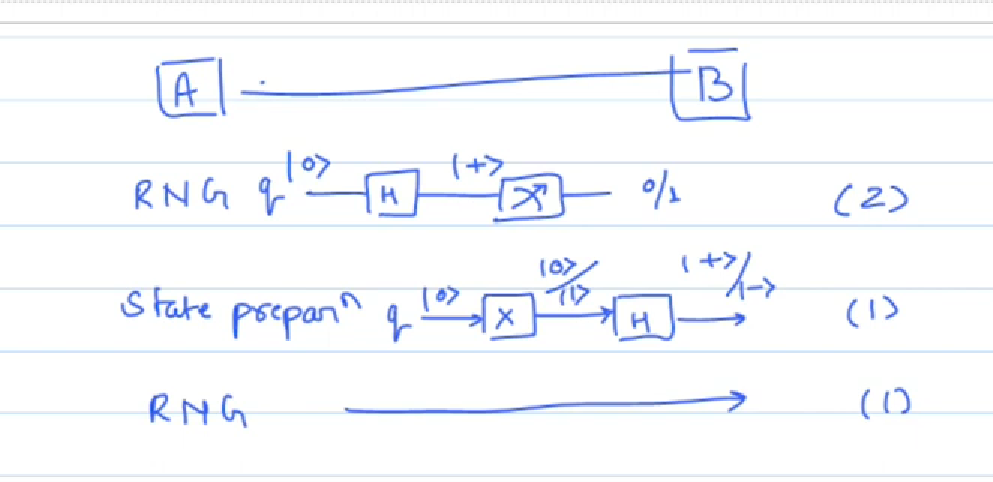

In [2]:
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister
from qiskit.visualization import *
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session

import numpy as np
from numpy.random import randint

service = QiskitRuntimeService(channel="ibm_quantum")
backend = service.least_busy(operational=True, simulator=True)
backend.name

qiskit_runtime_service.__init__:INFO:2024-04-01 10:18:07,210: Default instance: quantum-explorer/group-7/project-2


'ibmq_qasm_simulator'

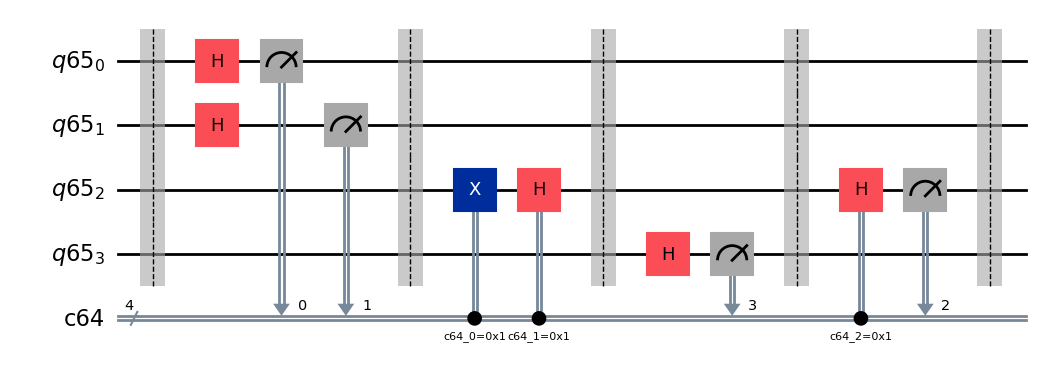

In [29]:
# Circuit for single iteration and signle qubit sharing as key
q_reg=QuantumRegister(4)
c_reg=ClassicalRegister(4)
q_ckt = QuantumCircuit(q_reg,c_reg)
q_ckt.draw()
q_ckt.barrier()

#Random number generator for Alice
q_ckt.h(q_reg[0])
q_ckt.h(q_reg[1])
q_ckt.measure(q_reg[0],c_reg[0]) #Raw qubit selection
q_ckt.measure(q_reg[1],c_reg[1]) # Basis selection
q_ckt.barrier()

#State preparation of Alice
q_ckt.x(q_reg[2]).c_if(c_reg[0],1)  # applying bit flip to 3rd qubit if raw qubit generation is 1
q_ckt.h(q_reg[2]).c_if(c_reg[1],1)  # applying hadamard to change the basis if basis selection qubit generation is 1
q_ckt.barrier()
q_ckt.draw()

#Random number generator for Bob to choose measurement basis
q_ckt.h(q_reg[3])
q_ckt.measure(q_reg[3],c_reg[3]) # Random no geneation fp Basis measurment for bob
q_ckt.barrier()
q_ckt.draw()

# Conditional H gate for random basis measurement for bob
q_ckt.h(q_reg[2]).c_if(c_reg[2],1)  # applying hadamard to change the basis before measurment in bob's side
q_ckt.measure(q_reg[2],c_reg[2])
q_ckt.barrier()
q_ckt.draw()

In [31]:


a_bit =[]
b_key=[]
a_basis=[]
b_bit=[]
N=100

for i in range(N):
    q_reg=QuantumRegister(4)
    c_reg=ClassicalRegister(4)
    q_ckt = QuantumCircuit(q_reg,c_reg)
    q_ckt.draw()
    q_ckt.barrier()

    #Random number generator for Alice
    q_ckt.h(q_reg[0])
    q_ckt.h(q_reg[1])
    q_ckt.measure(q_reg[0],c_reg[0]) #Raw qubit selection
    q_ckt.measure(q_reg[1],c_reg[1]) # Basis selection
    q_ckt.barrier()

    #State preparation of Alice
    q_ckt.x(q_reg[2]).c_if(c_reg[0],1)  # applying bit flip to 3rd qubit if raw qubit generation is 1
    q_ckt.h(q_reg[2]).c_if(c_reg[1],1)  # applying hadamard to change the basis if basis selection qubit generation is 1
    q_ckt.barrier()
    q_ckt.draw()

    #Random number generator for Bob to choose measurement basis
    q_ckt.h(q_reg[3])
    q_ckt.measure(q_reg[3],c_reg[3]) # Random no geneation fp Basis measurment for bob
    q_ckt.barrier()
    q_ckt.draw()

    # Conditional H gate for random basis measurement for bob
    q_ckt.h(q_reg[2]).c_if(c_reg[2],1)  # applying hadamard to change the basis before measurment in bob's side
    q_ckt.measure(q_reg[2],c_reg[2])
    q_ckt.barrier()
    q_ckt.draw()

    # Measuring or running the circuit
    job=backend.run(q_ckt, shots=1)
    result = job.result()

    # Post Processing After measurment like discarding or retaining the key of finding checked key
    a_bit.append(int(result.get_memory()[0][0])) # 0th classical register for Alice's Raw qubit's value 
    a_basis.append(int(result.get_memory()[0][1])) # 1th classical register for Alice's Random Basis selecton qubit's value 
    b_bit.append(int(result.get_memory()[0][2])) # 2nd classical register for Alice's Raw qubit's value after measuring bob's side 
    b_basis.append(int(result.get_memory()[0][3])) # 3rd classical register for Bob's Random Basis selection qubit's value 

#check if they uses same basis or not find the error using XOR
e =0
for i in range(N):
    if a_basis[i]==b_basis[i]:
        e=e+a_bit[i]^b_bit[i];
        print("Error: in ",i," iteration ", a_bit[i]^b_bit[i])
print("total error for ", N ," Iteration is" ,e)

Error: in  0  iteration  0
Error: in  3  iteration  0
Error: in  4  iteration  1
Error: in  8  iteration  0
Error: in  9  iteration  1
total error for  10  Iteration is 2
